# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_sleep_socialmedia_dataset.csv to student_sleep_socialmedia_dataset.csv


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import DBSCAN


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [153]:
# membaca dataset nya
df = pd.read_csv('student_sleep_socialmedia_dataset.csv')
df


,StudentID,GPA,SleepHours,SocialMediaHours,ExerciseHours,StudyHours,PartTimeJob,Major,Year,Device
0,1,2.75,6,5,0,3,No,Business,Freshman,Desktop
1,2,3.90,4,3,0,6,No,Business,Senior,Tablet
2,3,3.46,8,6,0,2,No,STEM,Senior,Tablet
3,4,3.20,9,5,3,5,Yes,STEM,Junior,Laptop
4,5,2.31,6,1,3,4,Yes,Social Science,Junior,Phone
...,...,...,...,...,...,...,...,...,...,...
2995,2996,3.73,6,1,3,5,Yes,Arts,Freshman,Tablet
2996,2997,2.31,9,4,1,2,Yes,Business,Senior,Laptop
2997,2998,2.62,9,7,0,4,Yes,Business,Senior,Laptop
2998,2999,2.58,5,6,0,2,No,Arts,Junior,Laptop


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


**- Memahami Struktur Data**


In [154]:
# struktur data melihat 10 data awal
df.head(10)


,StudentID,GPA,SleepHours,SocialMediaHours,ExerciseHours,StudyHours,PartTimeJob,Major,Year,Device
0,1,2.75,6,5,0,3,No,Business,Freshman,Desktop
1,2,3.90,4,3,0,6,No,Business,Senior,Tablet
2,3,3.46,8,6,0,2,No,STEM,Senior,Tablet
3,4,3.20,9,5,3,5,Yes,STEM,Junior,Laptop
4,5,2.31,6,1,3,4,Yes,Social Science,Junior,Phone
5,6,2.31,5,0,2,5,Yes,STEM,Senior,Tablet
6,7,2.12,6,1,2,5,No,STEM,Senior,Desktop
7,8,3.73,6,1,1,7,No,Social Science,Senior,Phone
8,9,3.20,5,0,3,6,Yes,Arts,Sophomore,Desktop
9,10,3.42,7,0,0,3,No,Arts,Senior,Desktop


In [155]:
df.info()

print(f"\nJumlah kolom dataset: {df.columns.size} kolom.")
print(f"Jumlah baris dataset: {df.index.size} baris.\n")

print("\nJenis data di setiap kolom:\n")
print(df.dtypes)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\nKolom numerikal:", numerical_columns)
print("Kolom kategorikal:", categorical_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StudentID         3000 non-null   int64  
 1   GPA               3000 non-null   float64
 2   SleepHours        3000 non-null   int64  
 3   SocialMediaHours  3000 non-null   int64  
 4   ExerciseHours     3000 non-null   int64  
 5   StudyHours        3000 non-null   int64  
 6   PartTimeJob       3000 non-null   object 
 7   Major             3000 non-null   object 
 8   Year              3000 non-null   object 
 9   Device            3000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 234.5+ KB

Jumlah kolom dataset: 10 kolom.
Jumlah baris dataset: 3000 baris.


Jenis data di setiap kolom:

StudentID             int64
GPA                 float64
SleepHours            int64
SocialMediaHours      int64
ExerciseHours         int64
StudyHours            int64

**- Menangani Data yang Hilang**

In [156]:
# mwngecek mission value
missing_values = df.isnull().sum()
print("Data yang hilang:\n", missing_values)


Data yang hilang:
 StudentID           0
GPA                 0
SleepHours          0
SocialMediaHours    0
ExerciseHours       0
StudyHours          0
PartTimeJob         0
Major               0
Year                0
Device              0
dtype: int64


**- Analisis Distribusi dan Korelasi**

In [157]:
df.describe()

,StudentID,GPA,SleepHours,SocialMediaHours,ExerciseHours,StudyHours
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.999650,6.523000,3.475667,1.447000,4.046000
std,866.169729,0.583399,1.712439,2.289648,1.125883,1.966343
min,1.000000,2.000000,4.000000,0.000000,0.000000,1.000000
25%,750.750000,2.490000,5.000000,1.000000,0.000000,2.000000
50%,1500.500000,3.010000,7.000000,3.000000,1.000000,4.000000
75%,2250.250000,3.510000,8.000000,6.000000,2.000000,6.000000
max,3000.000000,4.000000,9.000000,7.000000,3.000000,7.000000


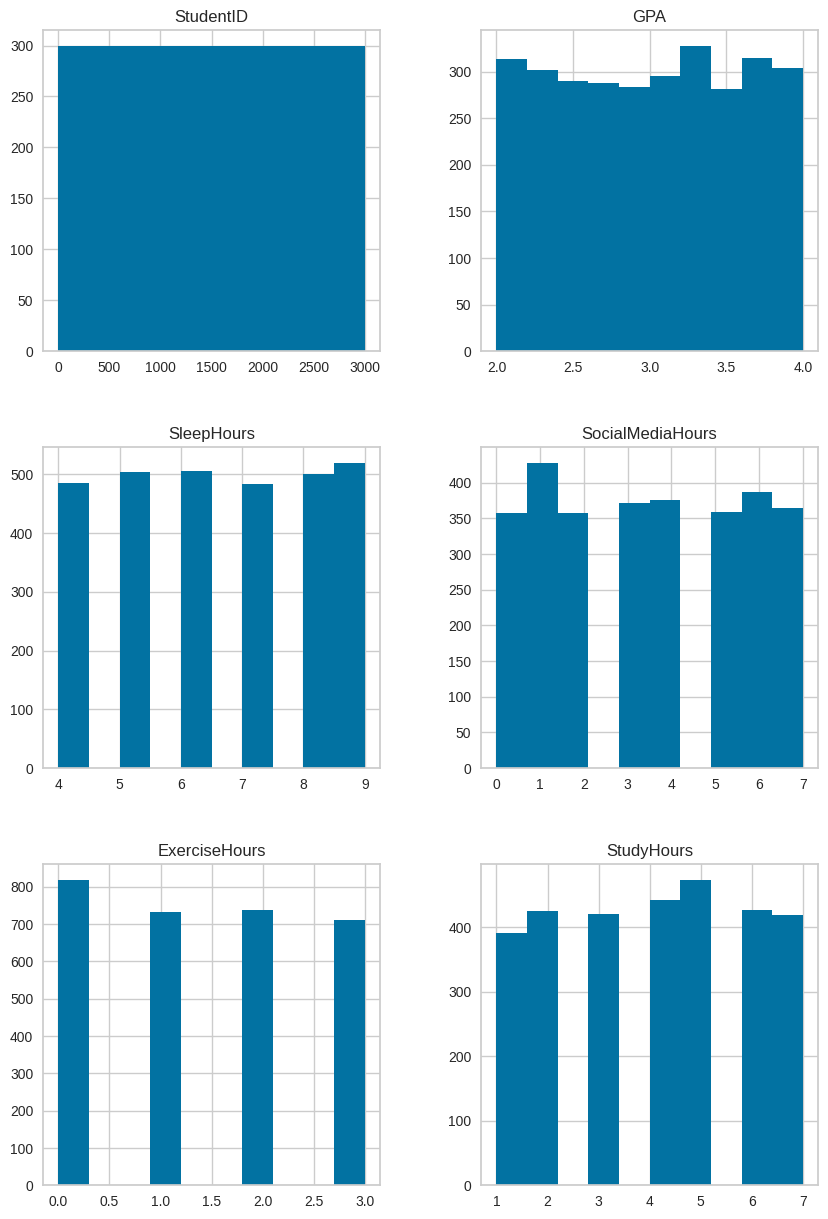

In [158]:
df.hist(figsize=(10, 15))
plt.show()

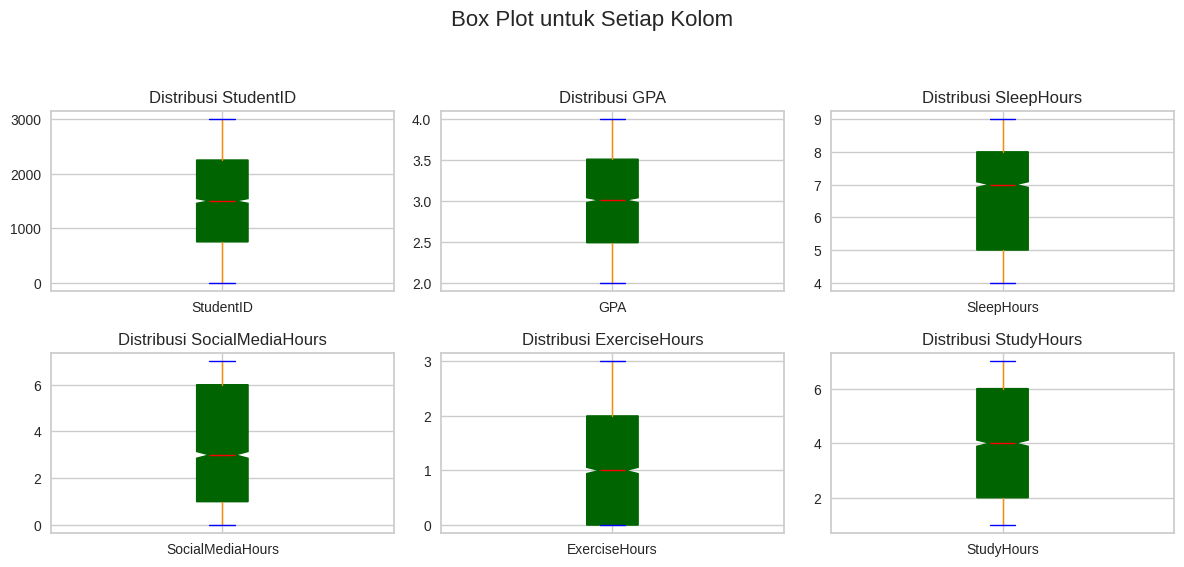

In [159]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8),
        patch_artist=True, notch=True, grid=True, color=dict(boxes='DarkGreen', whiskers='DarkOrange', medians='Red', caps='Blue'))

for ax, col in zip(plt.gcf().axes, df.columns):
    ax.set_title(f'Distribusi {col}')

plt.suptitle('Box Plot untuk Setiap Kolom', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


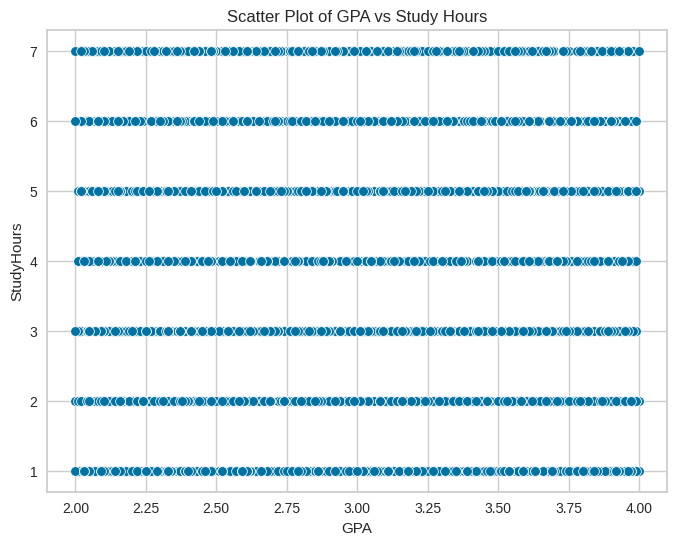

In [160]:
# scantter plot antara GPA student dengan jam belajar
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GPA', y='StudyHours', data=df)
plt.title('Scatter Plot of GPA vs Study Hours')
plt.show()

**- Visualisasi Data**

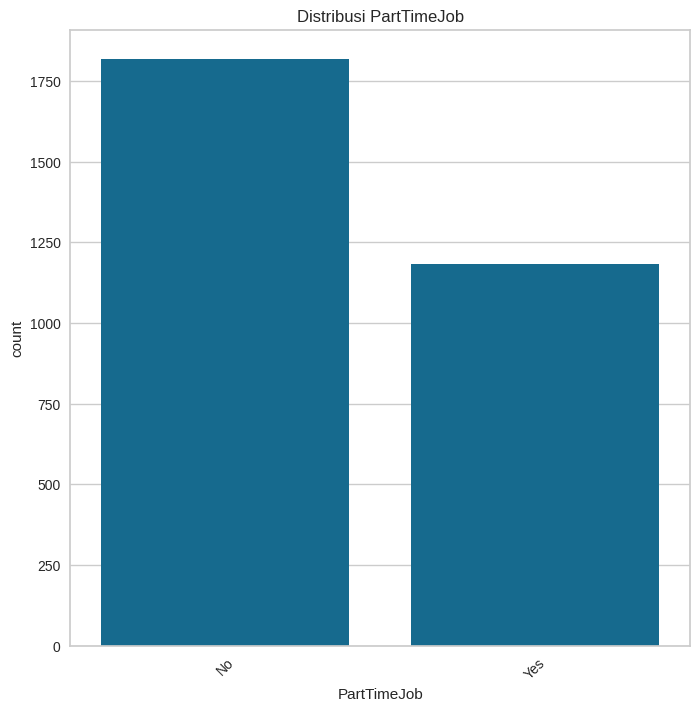

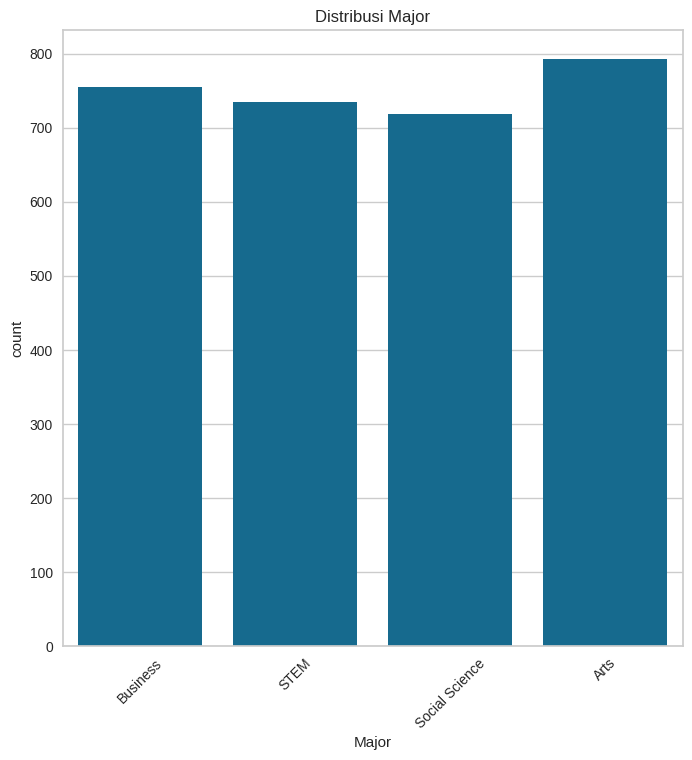

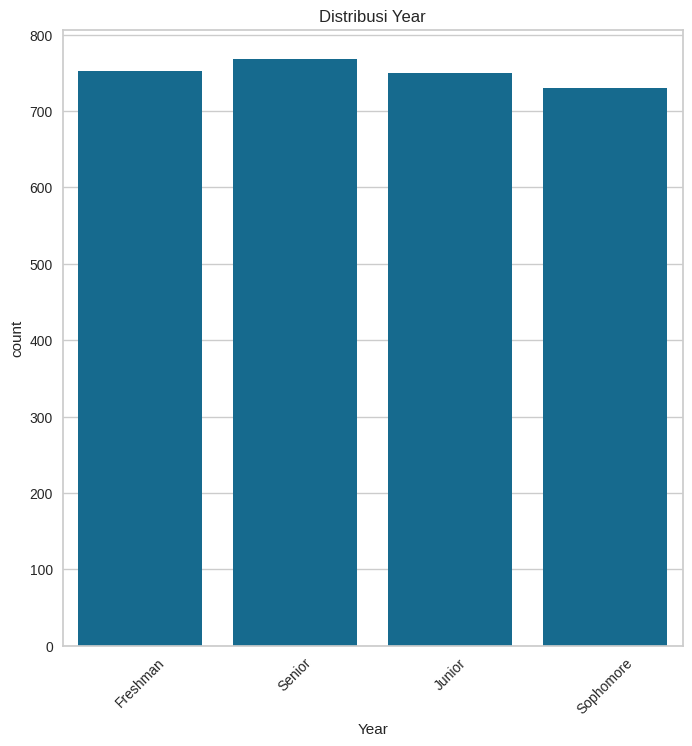

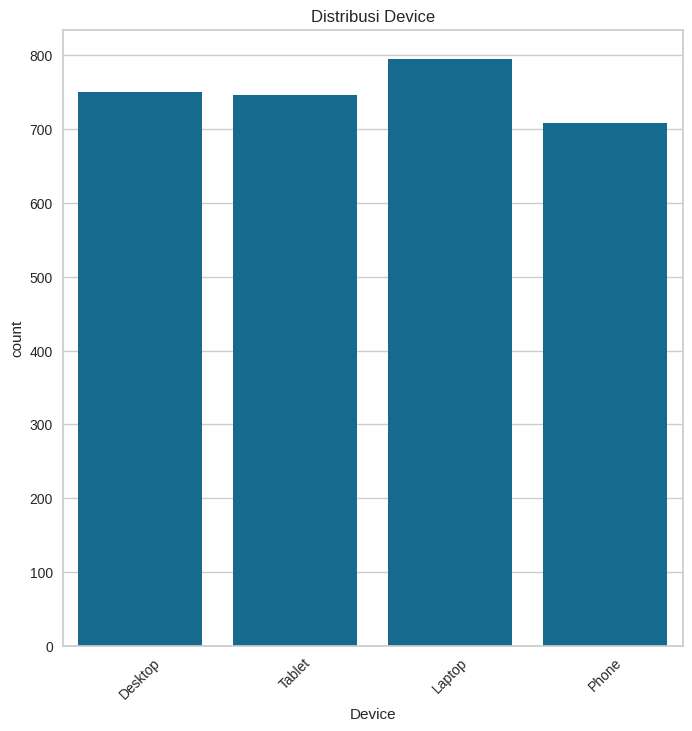

In [161]:
# visualisasi kolom kategorikal
for column in categorical_columns:
    plt.figure(figsize=(8, 8))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=45)



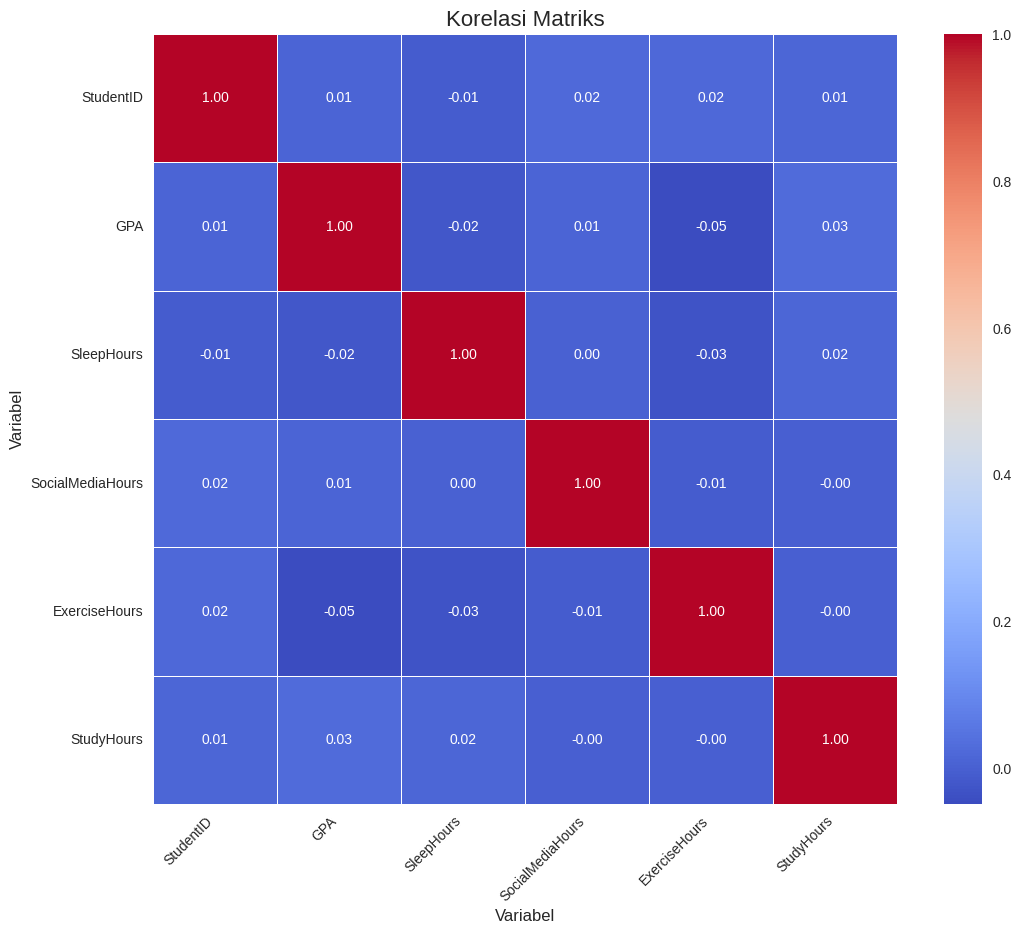

In [162]:
# korelasi variabel numerik
correlation_matrix = df.corr(numeric_only=True)

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

plt.title('Korelasi Matriks', fontsize=16)
plt.xlabel('Variabel', fontsize=12)
plt.ylabel('Variabel', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


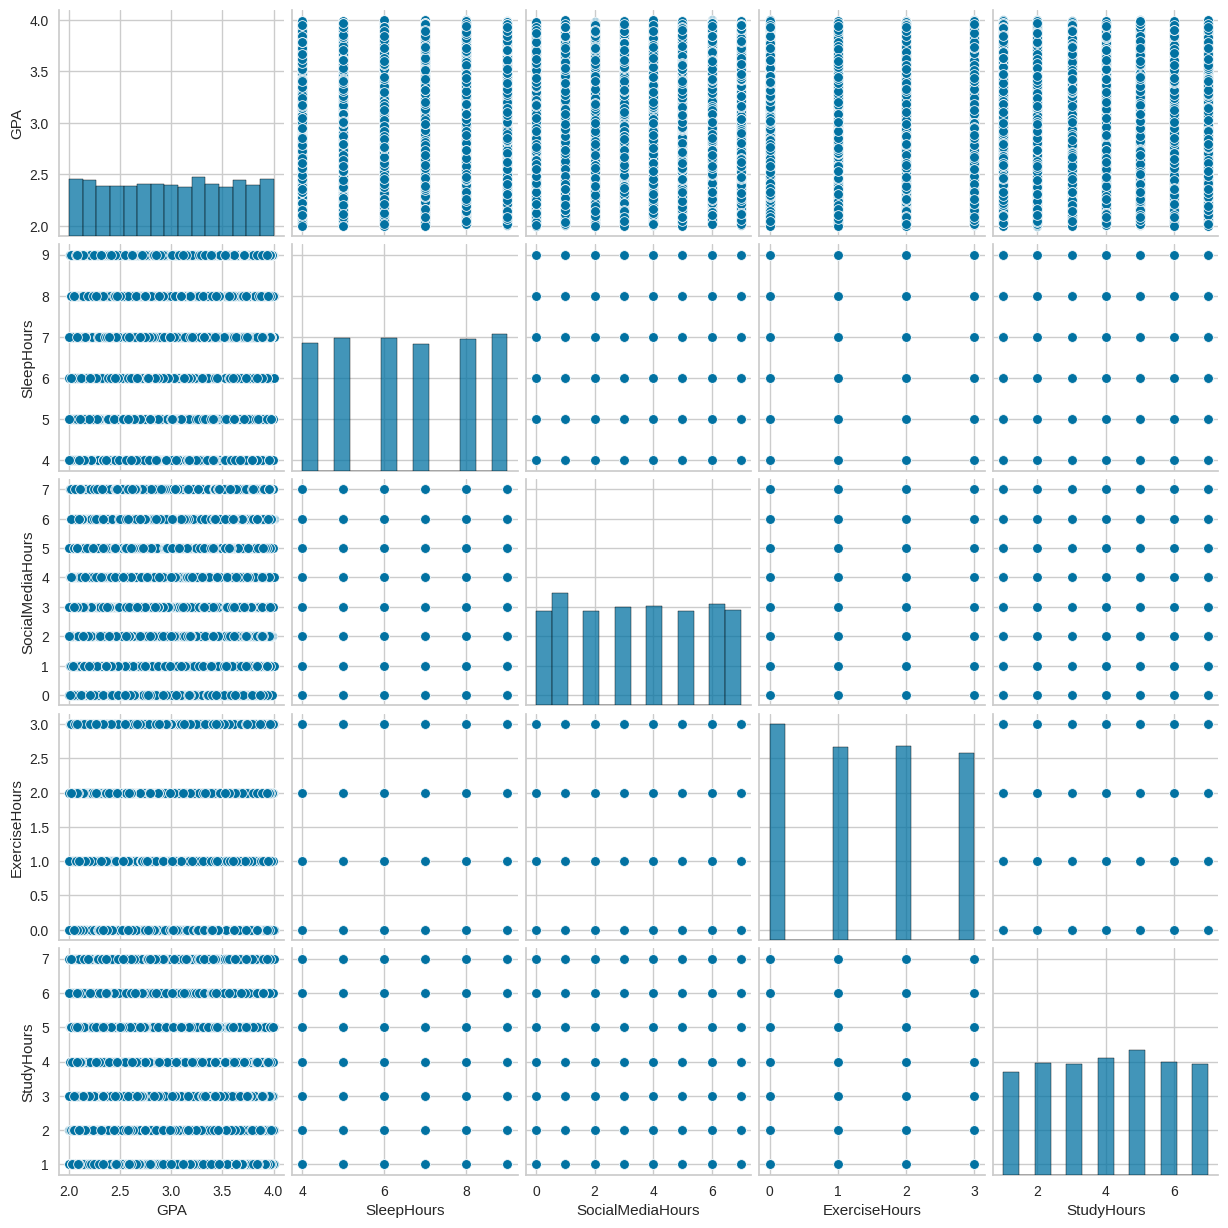

In [163]:

sns.pairplot(df[['GPA', 'SleepHours', 'SocialMediaHours', 'ExerciseHours', 'StudyHours']])
plt.show()

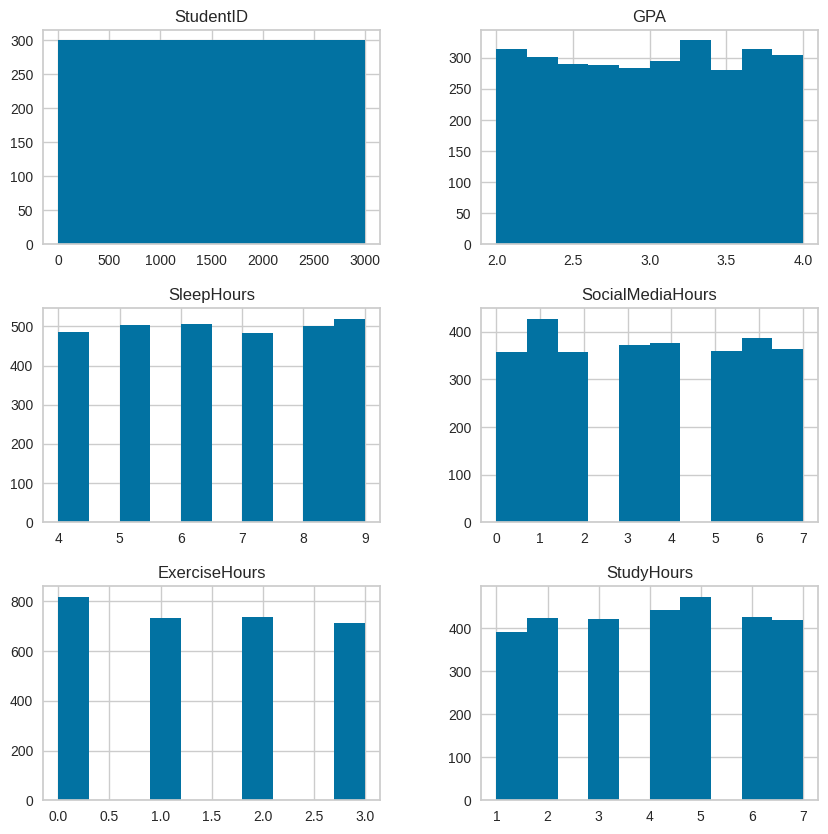

In [164]:
df.hist(figsize=(10, 10))
plt.show()

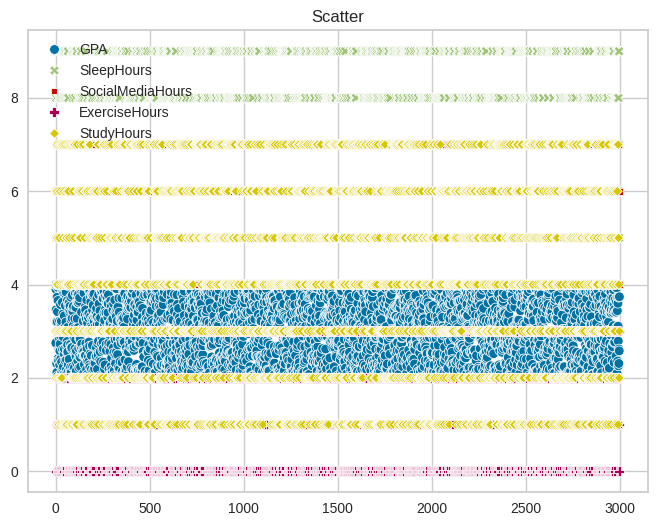

In [165]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[['GPA', 'SleepHours', 'SocialMediaHours', 'ExerciseHours', 'StudyHours']])
plt.title('Scatter')
plt.show()

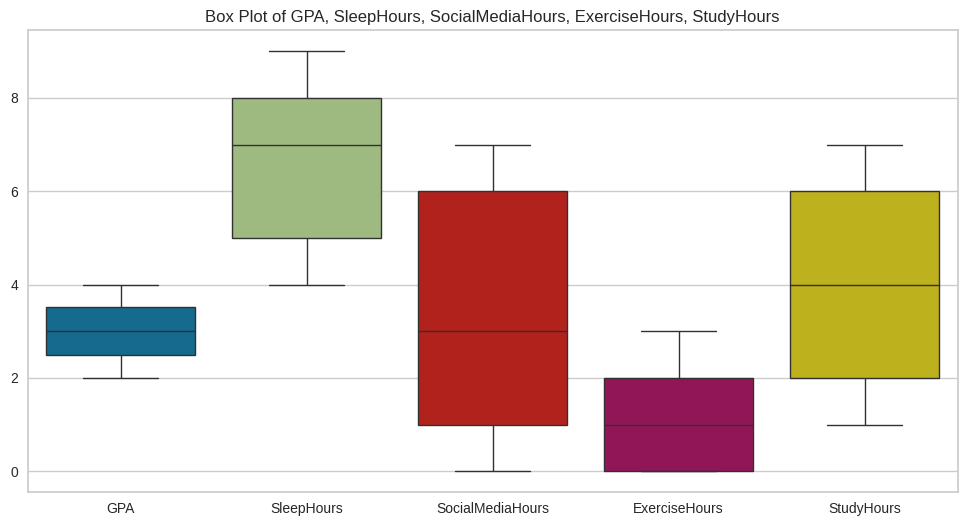

In [166]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['GPA', 'SleepHours', 'SocialMediaHours', 'ExerciseHours', 'StudyHours']])
plt.title('Box Plot of GPA, SleepHours, SocialMediaHours, ExerciseHours, StudyHours')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [167]:
# 1.Menangani Missing Value di semua kolom

# numerikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

In [168]:
# 2.Menahapus Data Duplikat

df.drop_duplicates(inplace=True)

In [169]:
 # 3.Normalisasi atau Standarisasi Fitur numerik

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numerical_cols])

In [170]:
# 5.Encoding Data Kategorikal

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())




   StudentID   GPA  SleepHours  SocialMediaHours  ExerciseHours  StudyHours  \
0          1  2.75           6                 5              0           3   
1          2  3.90           4                 3              0           6   
2          3  3.46           8                 6              0           2   
3          4  3.20           9                 5              3           5   
4          5  2.31           6                 1              3           4   

   PartTimeJob  Major  Year  Device  
0            0      1     0       0  
1            0      1     2       3  
2            0      2     2       3  
3            1      2     1       1  
4            1      3     1       2  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [171]:
# K-means
def train_kmeans(data, clusters=3):
    model = KMeans(n_clusters=clusters, random_state=42)
    model.fit(data)
    return model

cluster_model = train_kmeans(df, clusters=4)
df['ClusterGroup'] = cluster_model.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score untuk model: 0.5710330423366744


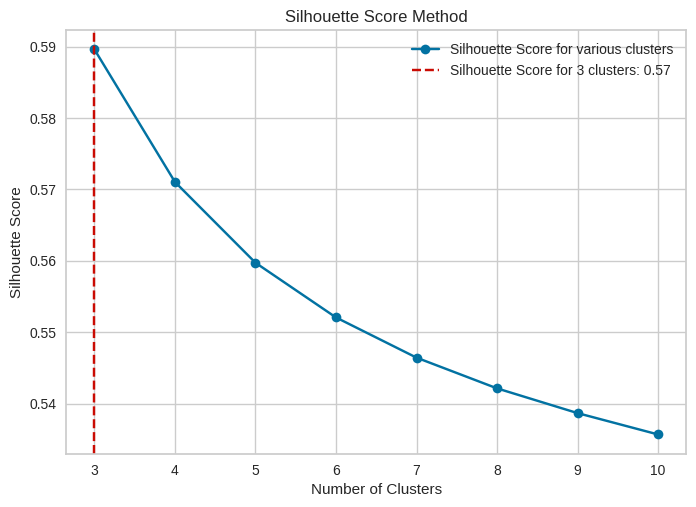

In [172]:
# hasil dari k-means
sil_score = silhouette_score(df, cluster_model.labels_)
print(f"Silhouette Score untuk model: {sil_score}")
silhouette_scores = []

for i in range(3, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(3, 11), silhouette_scores, marker='o', label='Silhouette Score for various clusters')
plt.axvline(x=3, color='r', linestyle='--', label=f"Silhouette Score for 3 clusters: {sil_score:.2f}")
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

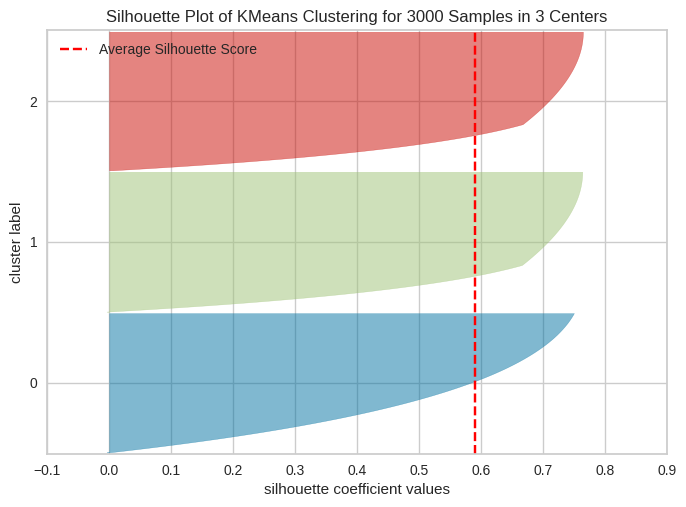

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [174]:

kmeans = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df)

visualizer.set_title("Silhouette Analysis untuk KMeans clustering")
visualizer.ax.set_xlabel("Nilai Silhouette")
visualizer.ax.set_ylabel("Cluster")

visualizer.show()


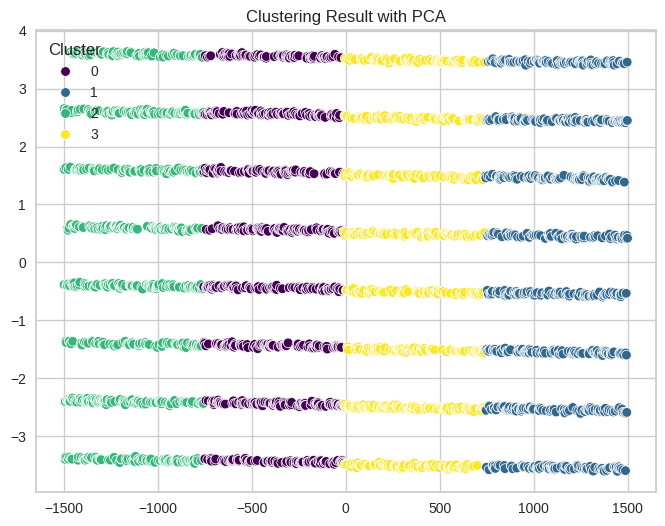

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))

train_data_with_clusters = pd.DataFrame(df)

train_data_with_clusters['Cluster'] = cluster_model.labels_

sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=train_data_with_clusters['Cluster'], palette='viridis')
plt.title('Clustering Result with PCA')
plt.show()

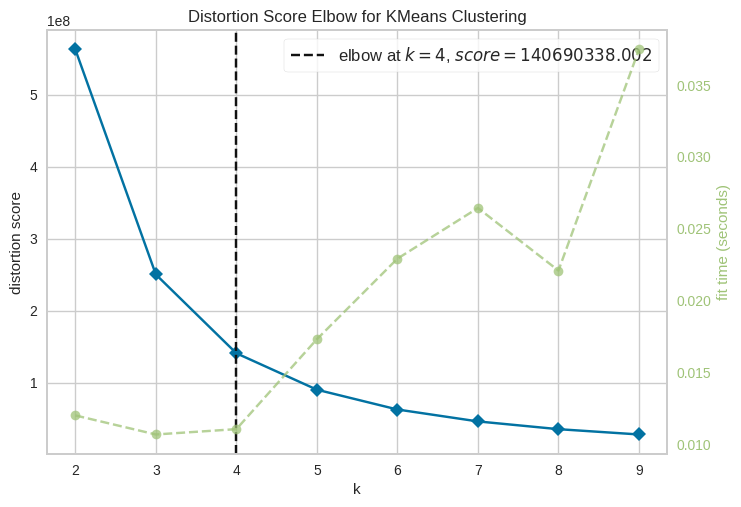

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [175]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df)
visualizer.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [176]:
print(df.columns)


Index(['StudentID', 'GPA', 'SleepHours', 'SocialMediaHours', 'ExerciseHours',
       'StudyHours', 'PartTimeJob', 'Major', 'Year', 'Device', 'ClusterGroup'],
      dtype='object')


In [177]:
for cluster_label in df['ClusterGroup'].unique():
    cluster_data = df[df['ClusterGroup'] == cluster_label]
    print(f"\nKarakteristik Cluster {cluster_label}:")
    print(cluster_data.describe())

    print(f"Rata-rata GPA student {cluster_label}: {cluster_data['GPA'].mean()}")



Karakteristik Cluster 2:
        StudentID         GPA  SleepHours  SocialMediaHours  ExerciseHours  \
count  744.000000  744.000000  744.000000        744.000000     744.000000   
mean   372.500000    2.987487    6.514785          3.443548       1.393817   
std    214.918589    0.588663    1.715199          2.270304       1.112520   
min      1.000000    2.010000    4.000000          0.000000       0.000000   
25%    186.750000    2.480000    5.000000          1.000000       0.000000   
50%    372.500000    3.010000    6.000000          3.000000       1.000000   
75%    558.250000    3.500000    8.000000          5.000000       2.000000   
max    744.000000    4.000000    9.000000          7.000000       3.000000   

       StudyHours  PartTimeJob       Major        Year      Device  \
count  744.000000   744.000000  744.000000  744.000000  744.000000   
mean     3.967742     0.375000    1.475806    1.477151    1.456989   
std      1.961001     0.484449    1.112491    1.094223    1.1

Tulis hasil interpretasinya di sini.
1. Cluster 0:
  Karakteristik Utama:


*   GPA: Rata-rata GPA sedikit lebih tinggi (3.010) dibandingkan dengan Cluster 1 dan Cluster 2, menunjukkan bahwa kelompok ini memiliki nilai akademik yang lebih baik.
*   Sleep Hours: Rata-rata tidur 6.58 jam, menunjukkan bahwa kelompok ini cenderung tidur lebih lama dibandingkan kelompok lain.
*   Social Media Hours: Rata-rata penggunaan media sosial 3.44 jam, yang menunjukkan waktu yang cukup signifikan digunakan untuk media sosial.
*   Exercise Hours: Rata-rata waktu untuk berolahraga 1.50 jam, menunjukkan bahwa kelompok ini juga memperhatikan kesehatannya.
*   Study Hours: Rata-rata waktu belajar 4.13 jam, menunjukkan bahwa kelompok ini memiliki waktu yang wajar untuk belajar di luar jam sekolah.

  Interpretasi: Cluster ini kemungkinan mencerminkan mahasiswa yang memiliki kinerja akademik baik, dengan kebiasaan tidur yang cukup, tetapi juga menghabiskan waktu cukup banyak untuk media sosial. Mereka mungkin tertarik dengan produk atau layanan yang mendukung keseimbangan akademik dan sosial mereka.
2. Cluster 1:
  Karakteristik Utama:


*   GPA: Rata-rata GPA sedikit lebih rendah (2.998) dibandingkan Cluster 0, menunjukkan kelompok ini memiliki kinerja akademik yang sedikit lebih rendah.

*   Sleep Hours: Rata-rata tidur 6.44 jam, sedikit lebih rendah dari Cluster 0.

*   Social Media Hours: Rata-rata penggunaan media sosial 3.62 jam, lebih banyak dibandingkan Cluster 0 dan Cluster 2.

*   Exercise Hours: Rata-rata waktu untuk berolahraga 1.49 jam, hampir sama dengan Cluster 0.

*   Study Hours: Rata-rata waktu belajar 4.06 jam, menunjukkan waktu belajar yang cukup baik meskipun lebih rendah dari Cluster 0

Interpretasi: Cluster ini mungkin mencerminkan mahasiswa dengan keseimbangan antara akademik dan kehidupan sosial yang lebih berorientasi pada media sosial. Mereka lebih cenderung menghabiskan lebih banyak waktu di media sosial, namun masih cukup aktif dalam kegiatan belajar.





3. Cluster 2:
Karakteristik Utama:


*   GPA: Rata-rata GPA 2.99, sedikit lebih rendah dibandingkan dengan Cluster 0 dan Cluster 1, menunjukkan kinerja akademik yang lebih rendah.
*   Sleep Hours: Rata-rata tidur 6.51 jam, mirip dengan Cluster 0 dan Cluster 1, menunjukkan pola tidur yang cukup baik.
*   Social Media Hours: Rata-rata penggunaan media sosial 3.44 jam, serupa dengan Cluster 0, menunjukkan waktu yang cukup banyak dihabiskan di media sosial.
*   Exercise Hours: Rata-rata waktu untuk berolahraga 1.39 jam, sedikit lebih rendah dibandingkan dengan Cluster 0 dan Cluster 1.
*   Study Hours: Rata-rata waktu belajar 3.97 jam, sedikit lebih rendah dibandingkan Cluster 0 dan Cluster 1

Interpretasi: Cluster ini mungkin mencerminkan mahasiswa dengan kinerja akademik yang sedikit lebih rendah dan mungkin lebih fokus pada media sosial. Mereka memiliki pola tidur yang baik, tetapi cenderung lebih sedikit menghabiskan waktu untuk belajar dan berolahraga dibandingkan kelompok lainnya.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [178]:
df.to_csv('hasil_clustering.csv', index=False)